# Function transformer:
    It is generally used for normal distribution of our data
It's types are as follow:
1. log transformer(right skwed):
2.reciprocal transformer:
3.square transformer(mostly on right skwed):
4.square root transformer:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [2]:
df=pd.read_csv("//Users//udayladdha//Desktop//DataSets//train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [7]:
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=23)

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_8345/549631021.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Age"])


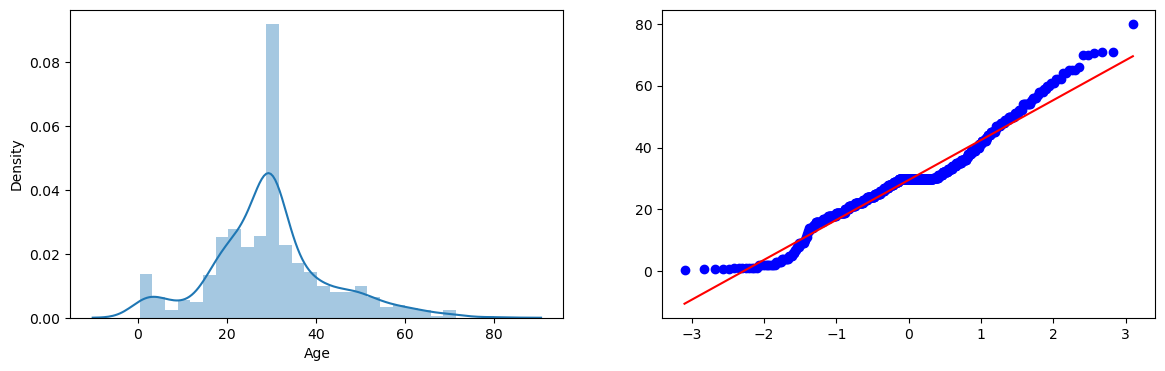

In [8]:
# checking the distribution of Age using dist plot and a QQ plot
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title="AGE"
sns.distplot(x_train["Age"])

plt.subplot(122)
stats.probplot(x_train["Age"],dist="norm",plot=plt)
plt.show()

# Distribution of Fare data before applying log tranformation(right skewed)

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_8345/2803749922.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Fare"]) # it is right skwed data so we will apply log transformation to improve our model


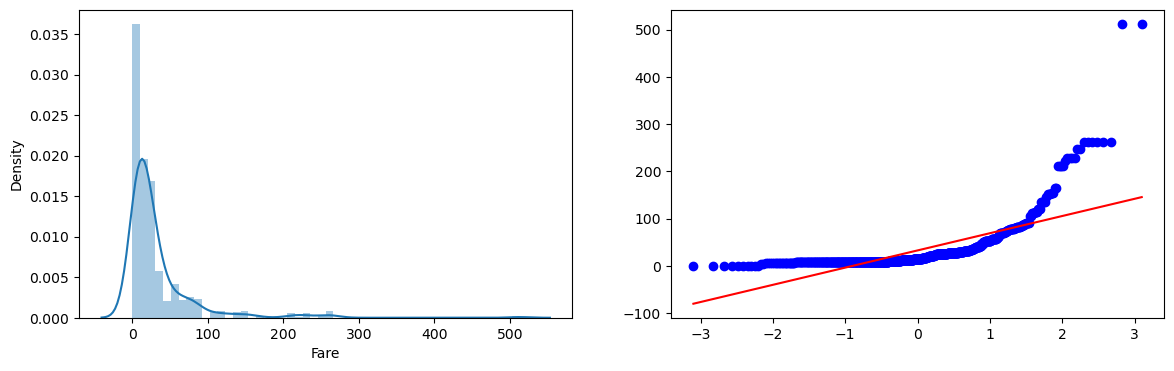

In [9]:
# checking the distribution of Fare using dist plot and a QQ plot
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train["Fare"]) # it is right skwed data so we will apply log transformation to improve our model

plt.subplot(122)
stats.probplot(x_train["Fare"],dist="norm",plot=plt)
plt.show()



In [10]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [11]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred1=(clf1.predict(x_test))
y_pred2=(clf2.predict(x_test))

In [13]:
print("accuracy_score of Lr",accuracy_score(y_test,y_pred1))
print("accuracy_score of DT",accuracy_score(y_test,y_pred2))

accuracy_score of Lr 0.6759776536312849
accuracy_score of DT 0.6368715083798883


In [14]:
trf=FunctionTransformer(func=np.log1p)

In [15]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [16]:
clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [17]:
y_pred11=clf1.predict(x_test_transformed)
y_pred22=clf2.predict(x_test_transformed)

In [18]:
print("accuracy_score of Lr",accuracy_score(y_test,y_pred11)) # LR got improved after applying log transformation
print("accuracy_score of DT",accuracy_score(y_test,y_pred22)) # DT is one of those model in which it does not depend if our data is 

accuracy_score of Lr 0.7318435754189944
accuracy_score of DT 0.6201117318435754


# distribution of Fare data after applying log tranformation

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_8345/465359876.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed["Fare"])


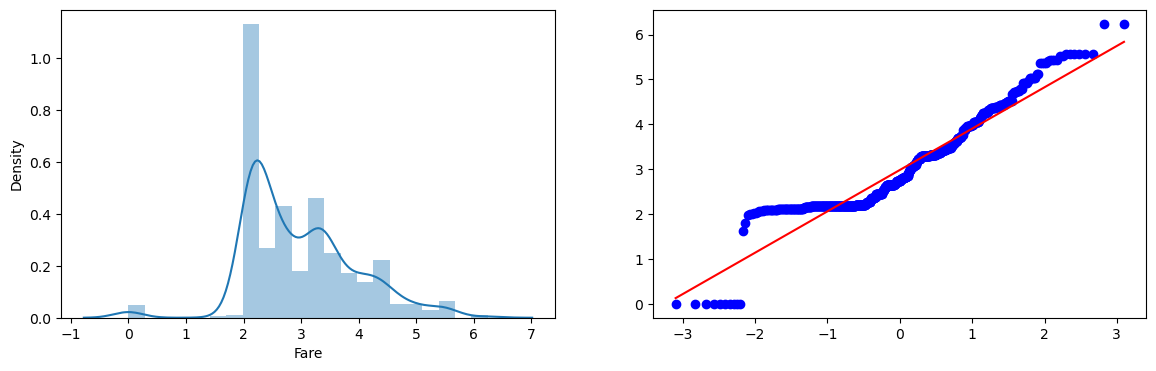

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train_transformed["Fare"])

plt.subplot(122)
stats.probplot(x_train_transformed["Fare"],dist="norm",plot=plt)
plt.show()

#    We observed the follow:
    1.in our data fare column was right skewed 
    2. we applied log transformation on our whole data set because 
    3. we could have log transformed only our fare column because it was right skewed not the age one
    4. DT model was not giving better result after log transformation as DT doest not care if data is normal distributed or not
    5. LR was improved after log transformation